**Introduction**
The Student Social Media & Relationships dataset contains anonymized records of students,social‐media behaviors and related life outcomes. It spans multiple countries and academic levels, focusing on key dimensions such as usage intensity, platform preferences, and relationship dynamics. Each row represents one student’s survey response, offering a cross‐sectional snapshot suitable for statistical analysis and machine‐learning applications.

**Dataset link**
https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships

**Dataset description**

1. **Student ID**:A unique integer identifier assigned to each survey respondent to enable de-duplication and track individual.
2.**Age**:The student’s age in completed years at the time of the survey, used to segment analysis by age group.
3.**Gender**:The student’s self-reported gender, recorded as "Male" or "Female".
4.**Academic_Level**:The highest level of education the respondent is currently enrolled in, with categories:"High School","Undergraduate","Graduate".
5.**Country**:The country of residence where the student completed the survey, enabling cross-country comparisons of social media behaviors and impacts.
6. **Avg_daily_usage_hours**:The average number of hours per day the student spends on social media platforms, calculated from self-reported weekday and weekend usage estimates.
7. **Most_used_platform**:The social media platform on which the student spends the most time (e.g., Instagram, Facebook, TikTok), used to examine platform-specific effects.
8.**Affects_academic_pressure**:A binary indicator (“Yes”/“No”) reflecting whether the student perceives their social media use as having a negative impact on their academic performance.
9.**Sleep_hours_per_night**:The respondent’s average nightly sleep duration in hours, provided to investigate correlations between screen time and sleep quality/quantity.
10.**Mental_health_score**:A self-rated integer from 1 (poor) to 10 (excellent) indicating overall mental well-being, allowing assessment of potential associations with social media habits.



In [91]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time
import warnings
warnings.filterwarnings('ignore')

In [92]:
#reading the csv file
data = pd.read_csv('/content/Students Social Media Addiction.csv')

In [93]:
#reading the contents of csv file
data.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [94]:
#Checking missing values
data.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


In [95]:
#Finding the rows and columns
data.shape

(705, 13)

In [96]:
#Description of the data
data.describe(include='all')

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705,705,705,705.000000,705,705,705.000000,705.000000,705,705.000000,705.000000
unique,NaN,NaN,2,3,110,NaN,12,2,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Female,Undergraduate,India,NaN,Instagram,Yes,NaN,NaN,Single,NaN,NaN
freq,NaN,NaN,353,353,53,NaN,249,453,NaN,NaN,384,NaN,NaN
mean,353.000000,20.659574,NaN,NaN,NaN,4.918723,NaN,NaN,6.868936,6.226950,NaN,2.849645,6.436879
std,203.660256,1.399217,NaN,NaN,NaN,1.257395,NaN,NaN,1.126848,1.105055,NaN,0.957968,1.587165
min,1.000000,18.000000,NaN,NaN,NaN,1.500000,NaN,NaN,3.800000,4.000000,NaN,0.000000,2.000000
25%,177.000000,19.000000,NaN,NaN,NaN,4.100000,NaN,NaN,6.000000,5.000000,NaN,2.000000,5.000000
50%,353.000000,21.000000,NaN,NaN,NaN,4.800000,NaN,NaN,6.900000,6.000000,NaN,3.000000,7.000000
75%,529.000000,22.000000,NaN,NaN,NaN,5.800000,NaN,NaN,7.700000,7.000000,NaN,4.000000,8.000000


In [97]:
#Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [98]:
#Correlation of the data i.e. how data is interrelated to each other
correlation = data.corr(numeric_only=True)

In [99]:
correlation

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,1.000000,0.222306,0.267524,0.173793,-0.055037,0.173258,0.041637
Age,0.222306,1.000000,-0.113682,0.125265,0.160278,-0.184482,-0.166396
Avg_Daily_Usage_Hours,0.267524,-0.113682,1.000000,-0.790582,-0.801058,0.804582,0.832000
Sleep_Hours_Per_Night,0.173793,0.125265,-0.790582,1.000000,0.707439,-0.677266,-0.764858
Mental_Health_Score,-0.055037,0.160278,-0.801058,0.707439,1.000000,-0.893572,-0.945051
Conflicts_Over_Social_Media,0.173258,-0.184482,0.804582,-0.677266,-0.893572,1.000000,0.933586
Addicted_Score,0.041637,-0.166396,0.832000,-0.764858,-0.945051,0.933586,1.000000


**Univariate Analysis**

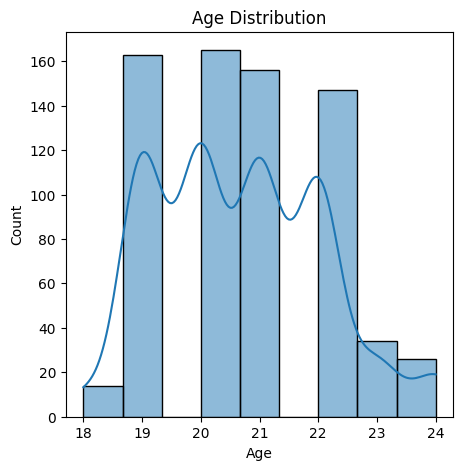

In [100]:
plt.figure(figsize=(5,5))
sns.histplot(data['Age'],bins=9,kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

This plot shows that max people's age lie between 20 and 21 and min is 18.

Text(0, 0.5, 'Country')

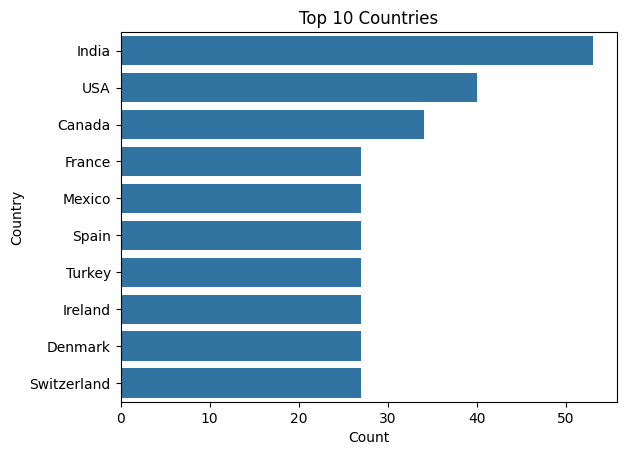

In [101]:
country_counts = data['Country'].value_counts().head(10)  # Top 10 countries
sns.barplot(y=country_counts.index, x=country_counts.values)
plt.title('Top 10 Countries')
plt.xlabel('Count')
plt.ylabel('Country')

This plot shows that most students are from India and then USA.

In [102]:
gender_counts=data['Gender'].value_counts() #count on the basis of gender

Text(0.5, 1.0, 'Gender Distribution')

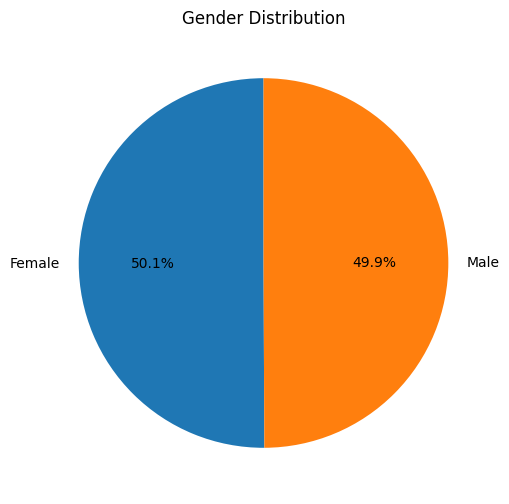

In [103]:
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

Above plot shows that female are 50.1% and male are 49.9% in our data.

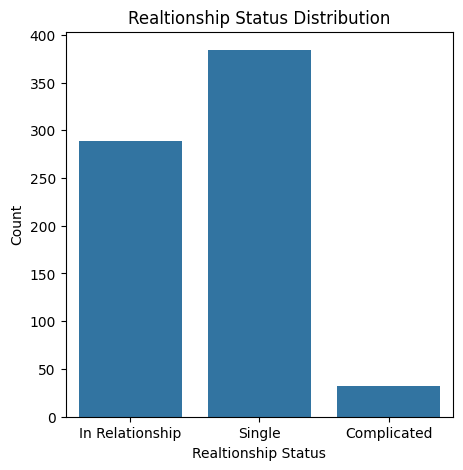

In [104]:
plt.figure(figsize=(5,5))
sns.countplot(x='Relationship_Status',data=data)
plt.title('Realtionship Status Distribution')
plt.xlabel('Realtionship Status')
plt.ylabel('Count')
plt.show()

This plot shows that Single students are more than students who are in realtionship or their relation status is complicated.

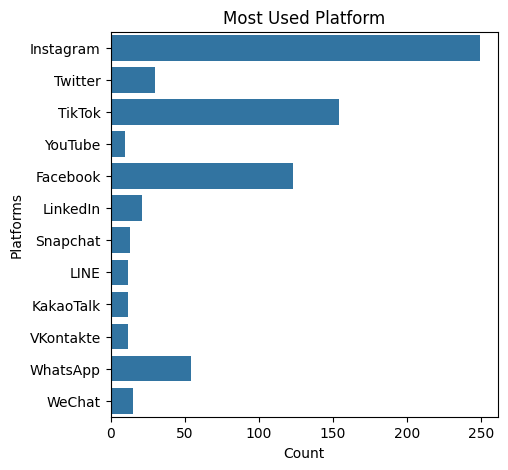

In [105]:
plt.figure(figsize=(5,5))
sns.countplot(y='Most_Used_Platform',data=data)
plt.title('Most Used Platform')
plt.ylabel('Platforms')
plt.xlabel('Count')
plt.show()

Most students use instagram then twitter and then whatsapp.

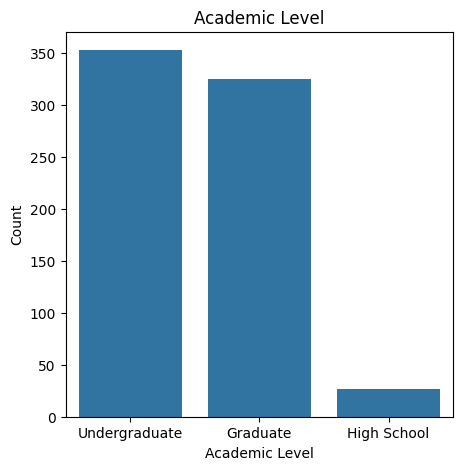

In [106]:
plt.figure(figsize=(5,5))
sns.countplot(x='Academic_Level',data=data)
plt.title('Academic Level')
plt.xlabel('Academic Level')
plt.ylabel('Count')
plt.show()

This plot shows that most of the students are in undergraduation level.

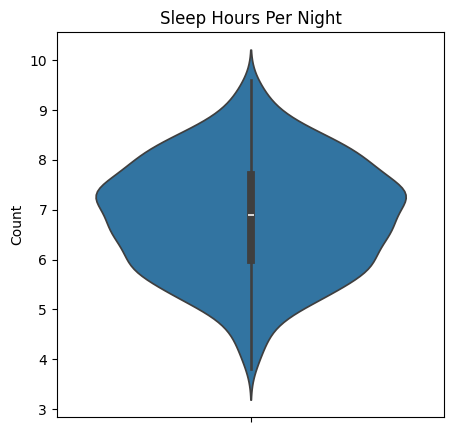

In [107]:
plt.figure(figsize=(5,5))
sns.violinplot(y='Sleep_Hours_Per_Night',data=data)
plt.title('Sleep Hours Per Night')
plt.ylabel('Count')
plt.show()

This violin plot shows that most of the students sleeps for 7-8 hrs.

**Bivariate Analysis**

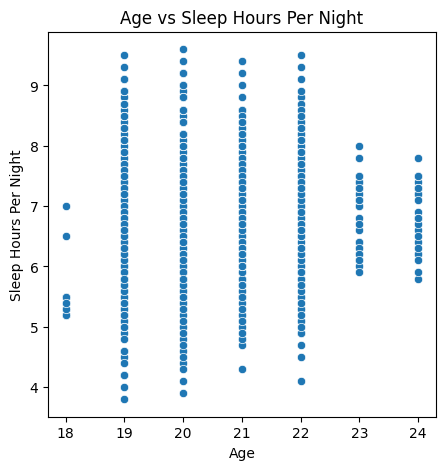

In [108]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Age',y='Sleep_Hours_Per_Night',data=data)
plt.title('Age vs Sleep Hours Per Night')
plt.xlabel('Age')
plt.ylabel('Sleep Hours Per Night')
plt.show()

This scatter plot shows that 20 year students sleeps the most and 24 year students sleep for less time.

<Axes: xlabel='Affects_Academic_Performance', ylabel='count'>

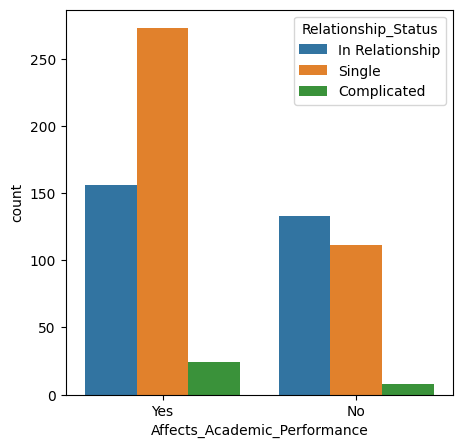

In [109]:
plt.figure(figsize=(5,5))
sns.countplot(x='Affects_Academic_Performance',hue='Relationship_Status',data=data)

The above plot shows that students who are in realtionship, their academic performance gets more affected as comapred to those who are single or in a complicated realtionship.

<Axes: xlabel='Affects_Academic_Performance', ylabel='count'>

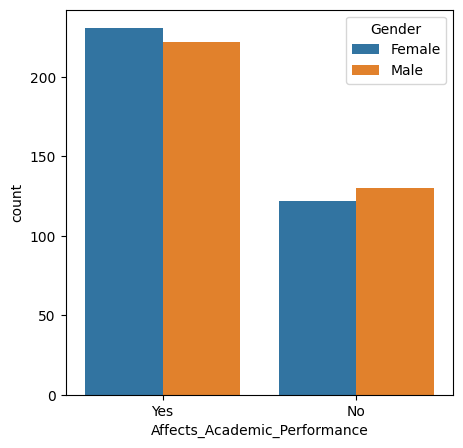

In [110]:
plt.figure(figsize=(5,5))
sns.countplot(x='Affects_Academic_Performance',hue='Gender',data=data)

The above graph shows that females are more likely to be affected by academic performance.

<Axes: xlabel='Academic_Level', ylabel='Sleep_Hours_Per_Night'>

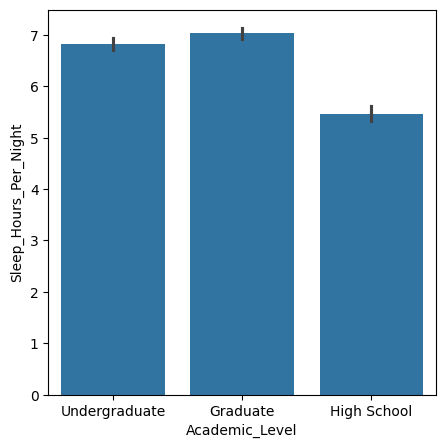

In [111]:
plt.figure(figsize=(5,5))
sns.barplot(x='Academic_Level',y='Sleep_Hours_Per_Night',data=data)

The above graph shows that graduate students have more sleeping hours than those students who are in high school or are undergraduate.

<Axes: xlabel='Relationship_Status', ylabel='Age'>

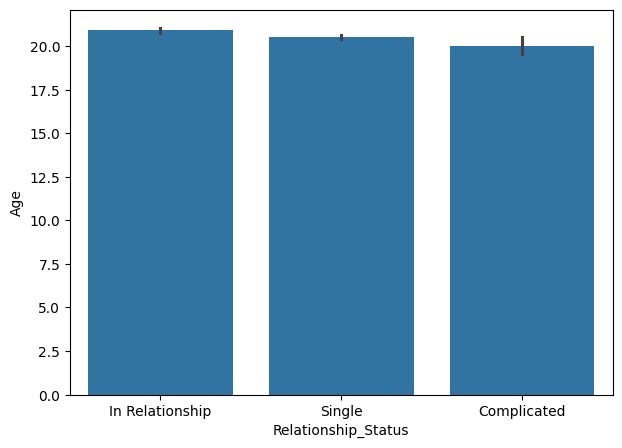

In [112]:
plt.figure(figsize=(7,5))
sns.barplot(x='Relationship_Status',y='Age',data=data)

The above plot shows that more age signifies that you're more likely in a realtionship.

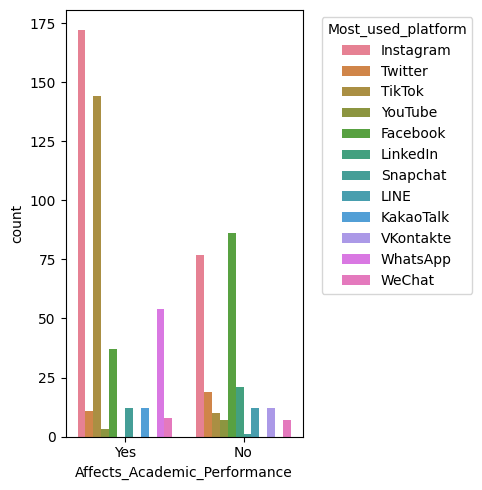

In [113]:
plt.figure(figsize=(5,5))
sns.countplot(x='Affects_Academic_Performance',hue='Most_Used_Platform',data=data)
plt.legend(title='Most_used_platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

The above plot shows that most students who use social media are more likely to get effected by academic performance.

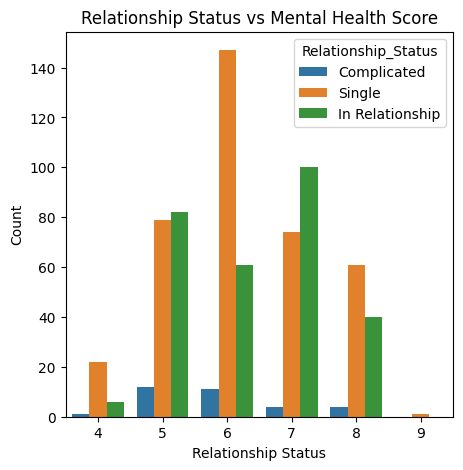

In [114]:
plt.figure(figsize=(5,5))
sns.countplot(x='Mental_Health_Score',hue='Relationship_Status',data=data)
plt.title('Relationship Status vs Mental Health Score')
plt.xlabel('Relationship Status')
plt.ylabel('Count')
plt.show()

The above plot shows that majority students those who are in realtionship have mental heath score as 6 and the majority students who are single have mental health score as 7 and those who are in a complicated realtionship have 5 or 6 as mental health score.

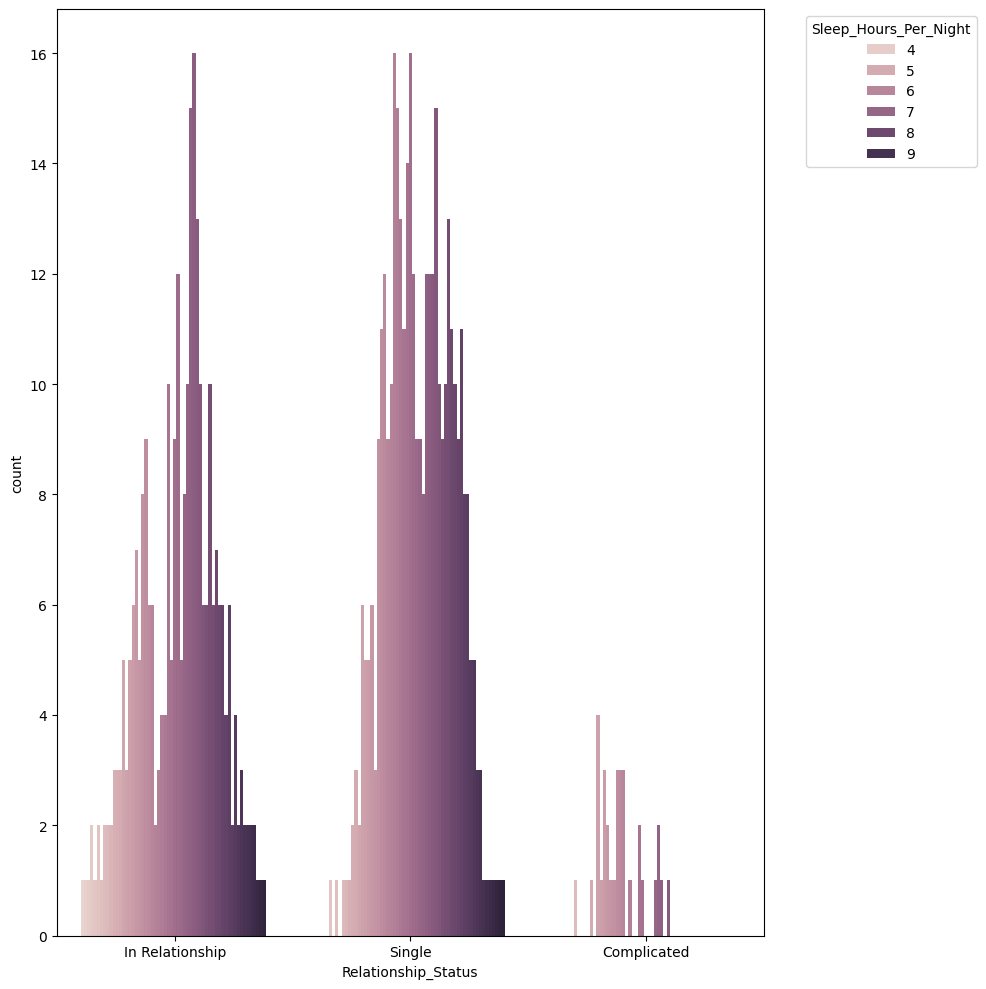

In [115]:
plt.figure(figsize=(10,10))
sns.countplot(x='Relationship_Status',hue='Sleep_Hours_Per_Night',data=data)
plt.legend(title='Sleep_Hours_Per_Night', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

The above plot shows that max students those who are in relationship sleeps for 7-8 hours whereas max students who are single sleeps for 5-6 hours and those who are in complicated realtionship sleeps for 4-5 hours.

<Axes: xlabel='Affects_Academic_Performance', ylabel='count'>

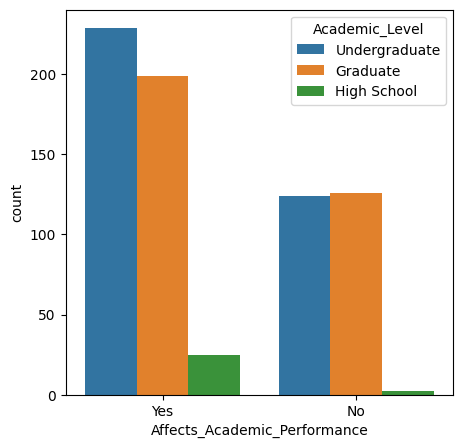

In [116]:
plt.figure(figsize=(5,5))
sns.countplot(x='Affects_Academic_Performance',hue='Academic_Level',data=data)

The above graph shows that most undergraduate students are more likely to affect their academic performance.

<Axes: xlabel='Relationship_Status', ylabel='count'>

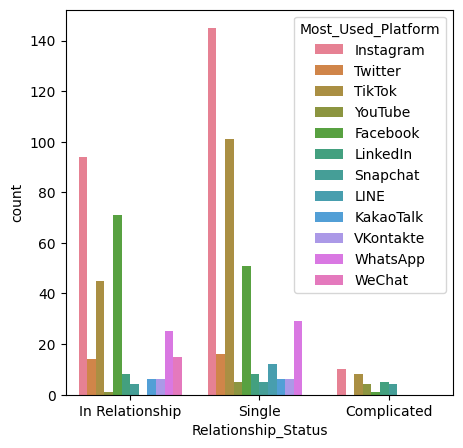

In [117]:
plt.figure(figsize=(5,5))
sns.countplot(x='Relationship_Status',hue='Most_Used_Platform',data=data)

The above graph shows that most students whether they are in realtionship, single or complicated use instagram the most.

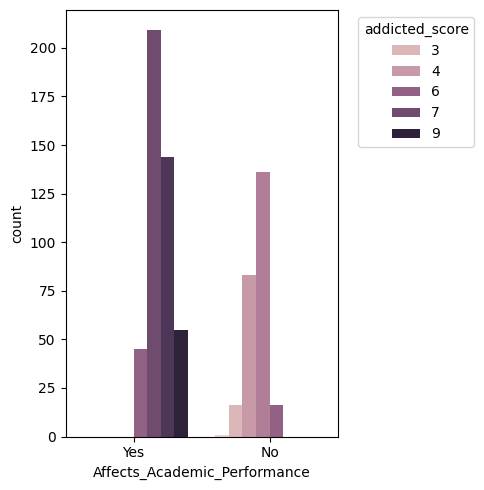

In [118]:
plt.figure(figsize=(5,5))
sns.countplot(x='Affects_Academic_Performance',hue='Addicted_Score',data=data)
plt.legend(title='addicted_score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

The above graph shows that students who are more addicted to social media are more likely to affect their academic performance.

<Axes: xlabel='Relationship_Status', ylabel='count'>

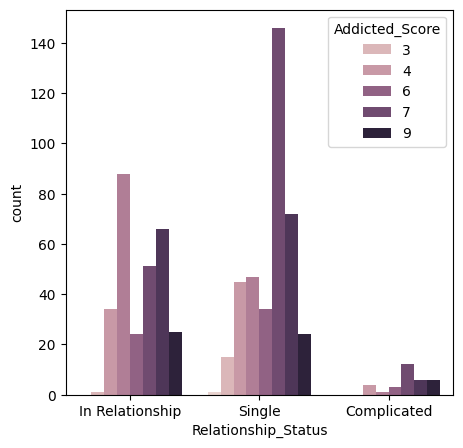

In [119]:
plt.figure(figsize=(5,5))
sns.countplot(x='Relationship_Status',hue='Addicted_Score',data=data)

The above grph shows that those who are single are more likely to be addicted to social media.

<Axes: >

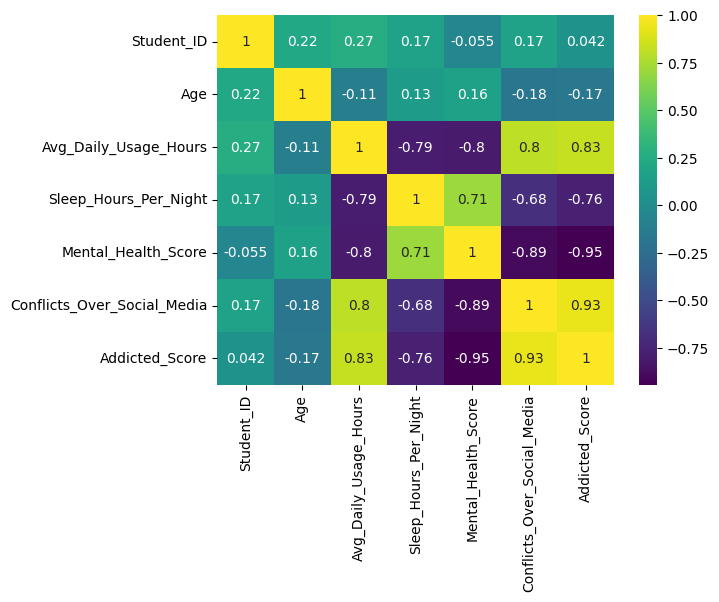

In [120]:
sns.heatmap(correlation,annot=True,cmap='viridis')

Darker shades show highly positive correlation (they are highly correlated). Lighter shades show negative correlation i.e. if one variable is increasing, the other is decreasing. Here we can see that duration_int and is_movie are highly correlated.

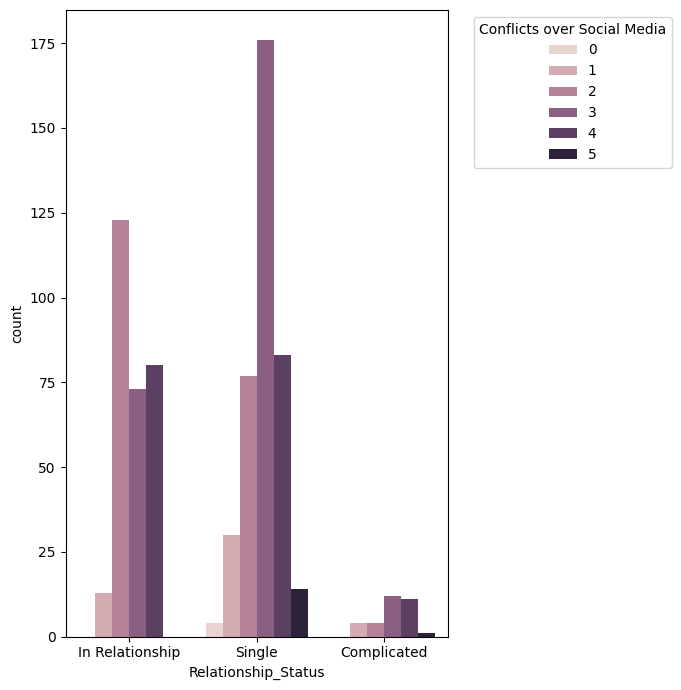

In [121]:
plt.figure(figsize=(7,7))
sns.countplot(x='Relationship_Status',hue='Conflicts_Over_Social_Media',data=data)
plt.legend(title='Conflicts over Social Media', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

the above graph shows that those who are in realtionship are more likely to have conflicts over social media.

In [122]:
le=LabelEncoder() #converting categorical values to numerical values for bette interpretation
data['Academic_Level']=le.fit_transform(data['Academic_Level'])
data['Relationship_Status']=le.fit_transform(data['Relationship_Status'])
data['Gender']=le.fit_transform(data['Gender'])
data['Affects_Academic_Performance']=le.fit_transform(data['Affects_Academic_Performance'])
data['Most_Used_Platform']=le.fit_transform(data['Most_Used_Platform'])

In [123]:
data['Addicted_Score'].value_counts()

,count
Addicted_Score,
7,209
8,144
5,136
4,83
6,61
9,55
3,16
2,1


In [124]:
data.head(3)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,0,2,Bangladesh,5.2,1,1,6.5,6,1,3,8
1,2,22,1,0,India,2.1,7,0,7.5,8,2,0,3
2,3,20,0,2,USA,6.0,6,1,5.0,5,0,4,9


In [125]:
x=data.drop(columns=['Country','Addicted_Score','Student_ID','Affects_Academic_Performance'])

In [126]:
y=data['Addicted_Score']

In [127]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2) #splitting the data

Machine learning and model implementation

In [128]:
results={}

In [129]:
def train_and_evaluate_model(name,model, X_train, y_train, X_test, y_test):
    print(name)
    start_time = time.time()

# Train the model
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f"Training time: {training_time:.4f} seconds")
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", cm)

     # Cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print(f"Cross-validation Accuracy (5-fold): Mean={cv_scores.mean():.4f}, Std={cv_scores.std():.4f}")

    results[name] = {
        'accuracy': accuracy,
        'training_time': training_time,
        'cv_accuracy_mean': cv_scores.mean(),
        'cv_accuracy_std': cv_scores.std()
    }

Logistic Regression

In [130]:
lr=LogisticRegression()
train_and_evaluate_model('Logistic Regression',lr,X_train,y_train,X_test,y_test)

Logistic Regression
Training time: 0.0606 seconds
Accuracy: 0.8582

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         2
           4       0.72      0.87      0.79        15
           5       0.91      0.83      0.87        35
           6       1.00      0.44      0.62         9
           7       0.85      1.00      0.92        41
           8       0.87      0.93      0.90        28
           9       0.86      0.60      0.71        10

    accuracy                           0.86       141
   macro avg       0.78      0.71      0.72       141
weighted avg       0.86      0.86      0.85       141


Confusion Matrix:
 [[ 0  0  1  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0 13  2  0  0  0  0]
 [ 0  0  4 29  0  2  0  0]
 [ 0  0  0  1  4  4  0  0]
 [ 0  0  0  0  0 41  0  0]
 [ 0  0  0  0  0  1 26  1]
 [ 0  0  0  0  0  0  4  6]]
Cross-validation Acc

KNN

In [131]:
knn=KNeighborsClassifier()
train_and_evaluate_model('KNN',knn,X_train,y_train,X_test,y_test)

KNN
Training time: 0.0044 seconds
Accuracy: 0.9433

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.67      1.00      0.80         2
           4       0.88      1.00      0.94        15
           5       1.00      0.91      0.96        35
           6       0.89      0.89      0.89         9
           7       0.98      1.00      0.99        41
           8       0.93      0.96      0.95        28
           9       0.89      0.80      0.84        10

    accuracy                           0.94       141
   macro avg       0.78      0.82      0.79       141
weighted avg       0.94      0.94      0.94       141


Confusion Matrix:
 [[ 0  1  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0]
 [ 0  0  2 32  1  0  0  0]
 [ 0  0  0  0  8  1  0  0]
 [ 0  0  0  0  0 41  0  0]
 [ 0  0  0  0  0  0 27  1]
 [ 0  0  0  0  0  0  2  8]]
Cross-validation Accuracy (5-fold): 

Decision Tree Classifier

In [132]:
dc=DecisionTreeClassifier()
train_and_evaluate_model('Decision Tree Classifier',dc,X_train,y_train,X_test,y_test)

Decision Tree Classifier
Training time: 0.0048 seconds
Accuracy: 0.9291

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.67      1.00      0.80         2
           4       0.93      0.93      0.93        15
           5       0.97      0.94      0.96        35
           6       0.86      0.67      0.75         9
           7       0.93      0.98      0.95        41
           8       0.93      0.96      0.95        28
           9       0.90      0.90      0.90        10

    accuracy                           0.93       141
   macro avg       0.77      0.80      0.78       141
weighted avg       0.92      0.93      0.92       141


Confusion Matrix:
 [[ 0  1  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0 14  1  0  0  0  0]
 [ 0  0  1 33  1  0  0  0]
 [ 0  0  0  0  6  3  0  0]
 [ 0  0  0  0  0 40  1  0]
 [ 0  0  0  0  0  0 27  1]
 [ 0  0  0  0  0  0  1  9]]
Cross-validatio

Random Forest

In [133]:
rf=RandomForestClassifier()
train_and_evaluate_model('Random Forest',rf,X_train,y_train,X_test,y_test)

Random Forest
Training time: 0.2487 seconds
Accuracy: 0.9574

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00        15
           5       1.00      0.97      0.99        35
           6       0.89      0.89      0.89         9
           7       0.98      1.00      0.99        41
           8       0.90      1.00      0.95        28
           9       1.00      0.70      0.82        10

    accuracy                           0.96       141
   macro avg       0.80      0.82      0.80       141
weighted avg       0.95      0.96      0.95       141


Confusion Matrix:
 [[ 0  1  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0]
 [ 0  0  0 34  1  0  0  0]
 [ 0  0  0  0  8  1  0  0]
 [ 0  0  0  0  0 41  0  0]
 [ 0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  3  7]]
Cross-validation Accuracy 

SVC

In [134]:
sv=SVC()
train_and_evaluate_model('SVC',sv,X_train,y_train,X_test,y_test)

SVC
Training time: 0.0357 seconds
Accuracy: 0.7660

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.80      0.53      0.64        15
           5       0.76      1.00      0.86        35
           6       0.00      0.00      0.00         9
           7       0.80      1.00      0.89        41
           8       0.71      0.86      0.77        28
           9       0.00      0.00      0.00        10

    accuracy                           0.77       141
   macro avg       0.38      0.42      0.40       141
weighted avg       0.65      0.77      0.70       141


Confusion Matrix:
 [[ 0  0  1  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  8  7  0  0  0  0]
 [ 0  0  0 35  0  0  0  0]
 [ 0  0  0  3  0  6  0  0]
 [ 0  0  0  0  0 41  0  0]
 [ 0  0  0  0  0  4 24  0]
 [ 0  0  0  0  0  0 10  0]]
Cross-validation Accuracy (5-fold): 

AdaBoost

In [135]:
ab=AdaBoostClassifier()
train_and_evaluate_model('AdaBoost',ab,X_train,y_train,X_test,y_test)

AdaBoost
Training time: 0.1732 seconds
Accuracy: 0.8511

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.75      1.00      0.86        15
           5       0.97      0.94      0.96        35
           6       1.00      0.44      0.62         9
           7       0.89      1.00      0.94        41
           8       0.73      0.96      0.83        28
           9       0.00      0.00      0.00        10

    accuracy                           0.85       141
   macro avg       0.54      0.54      0.53       141
weighted avg       0.79      0.85      0.81       141


Confusion Matrix:
 [[ 0  0  1  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0]
 [ 0  0  2 33  0  0  0  0]
 [ 0  0  0  1  4  4  0  0]
 [ 0  0  0  0  0 41  0  0]
 [ 0  0  0  0  0  1 27  0]
 [ 0  0  0  0  0  0 10  0]]
Cross-validation Accuracy (5-fo

Neural Network

In [136]:
nn = MLPClassifier()
train_and_evaluate_model('Neural Network',nn,X_train,y_train,X_test,y_test)

Neural Network
Training time: 0.7692 seconds
Accuracy: 0.8156

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         2
           4       0.56      0.67      0.61        15
           5       0.82      0.80      0.81        35
           6       1.00      0.33      0.50         9
           7       0.87      0.98      0.92        41
           8       0.82      0.96      0.89        28
           9       1.00      0.50      0.67        10

    accuracy                           0.82       141
   macro avg       0.76      0.65      0.67       141
weighted avg       0.83      0.82      0.80       141


Confusion Matrix:
 [[ 0  0  1  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0 10  5  0  0  0  0]
 [ 0  0  7 28  0  0  0  0]
 [ 0  0  0  1  3  5  0  0]
 [ 0  0  0  0  0 40  1  0]
 [ 0  0  0  0  0  1 27  0]
 [ 0  0  0  0  0  0  5  5]]
Cross-validation Accuracy

In [137]:
comparison_data = pd.DataFrame.from_dict(results, orient='index')
print("Model Performance Comparison:")
print(comparison_data.sort_values(by='accuracy', ascending=False))

Model Performance Comparison:
                          accuracy  training_time  cv_accuracy_mean  \
Random Forest             0.957447       0.248658          0.946808   
KNN                       0.943262       0.004431          0.875964   
Decision Tree Classifier  0.929078       0.004752          0.929030   
Logistic Regression       0.858156       0.060570          0.870623   
AdaBoost                  0.851064       0.173160          0.712642   
Neural Network            0.815603       0.769210          0.824463   
SVC                       0.765957       0.035655          0.643442   

                          cv_accuracy_std  
Random Forest                    0.009696  
KNN                              0.028319  
Decision Tree Classifier         0.020410  
Logistic Regression              0.028676  
AdaBoost                         0.069313  
Neural Network                   0.019747  
SVC                              0.058808  


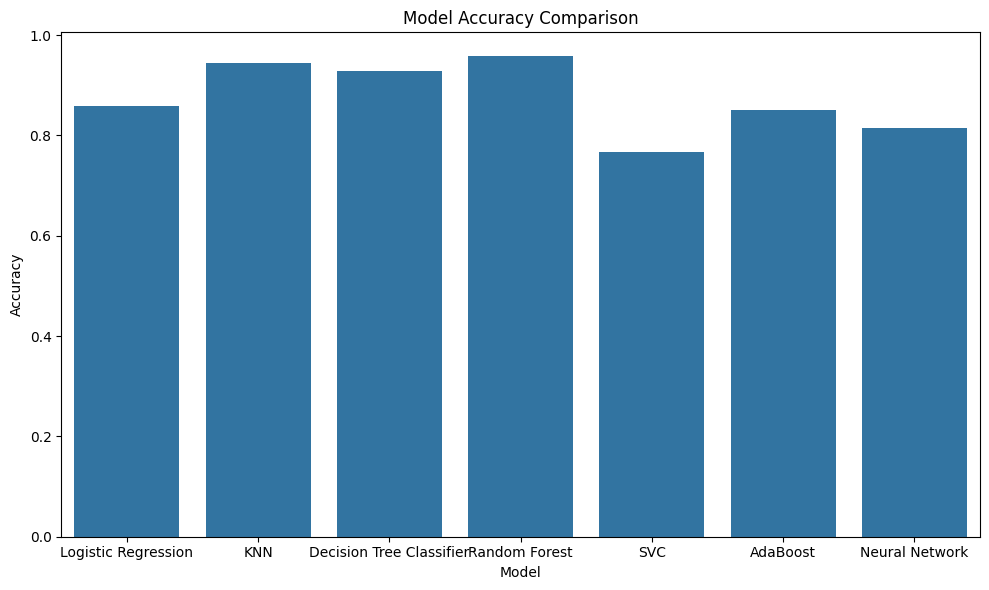

In [138]:
plt.figure(figsize=(10, 6))
sns.barplot(x=comparison_data.index, y='accuracy', data=comparison_data)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

The above graph shows that Random forest classifier shows the best performance.

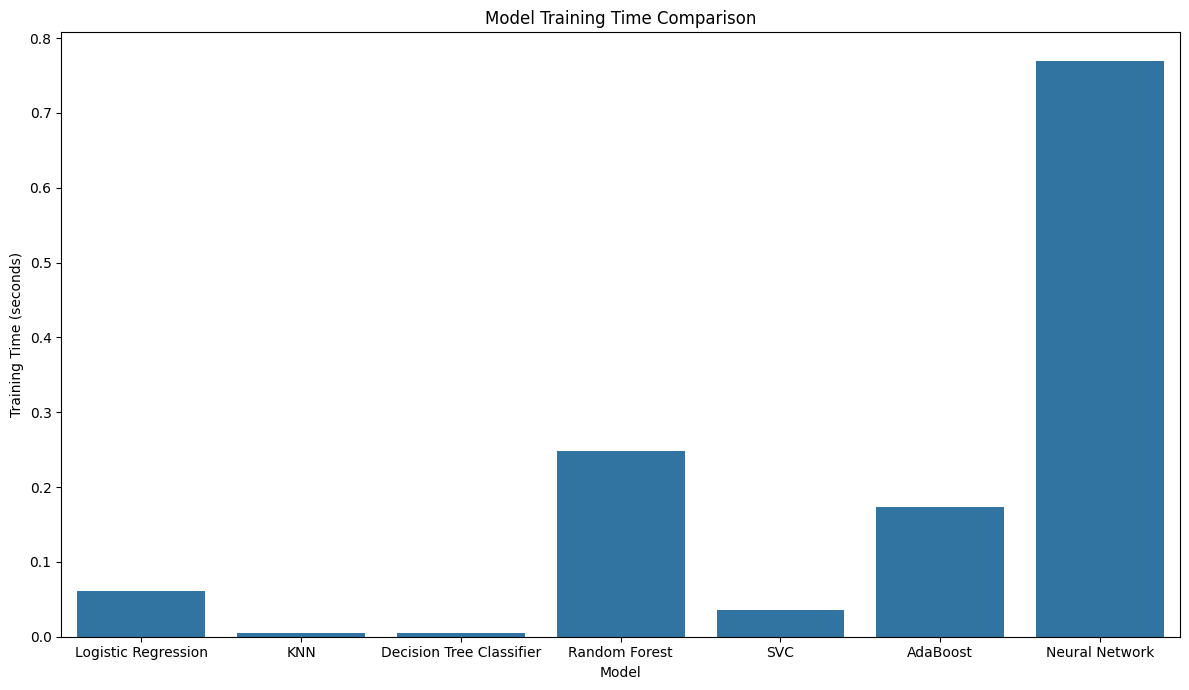

In [139]:
plt.figure(figsize=(12, 7))
sns.barplot(x=comparison_data.index, y='training_time', data=comparison_data)
plt.title('Model Training Time Comparison')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.tight_layout()
plt.show()

The above graph shows that the least time is taken by KNN and the max time is taken by Neural Networks.

**Observation**

**Accuracy**:
Random Forest is the best-performing model, achieving the highest test accuracy of 0.964, closely followed by KNN and Decision trees.
SVC has the lowest accuracy at 0.765, making it the least effective among the listed models.


**Cross-validation:** The cross-validation accuracy means for the top models (KNN, Random Forest,Decision Trees) are consistently high (all above 0.92), and their standard deviations are relatively low (below 0.03). This indicates that their performance is robust and generalizes well across different subsets of the data, suggesting low variance and good stability.

**Training Time:**
- KNN is fast (0.04 seconds) while maintaining good accuracy.
-Random forest takes less time and gives good accuracy.
- Decision Trees have good accuracy with moderate training time.
- Neural Networks takes the longest time.

## Conclusion

For this classification task, KNN is the most accurate models, providing a good combination of high accuracy and reasonable computational cost. Decision tree also offers a balance of high accuracy and fast training time. The consistent high performance of these models across test and cross-validation sets confirms that the data preprocessing and feature engineering steps have successfully created a model which predicts who is more likely to be social media addicted.
